# Machine Learning with SciPy

Acknowledgements: This chapter is adapted to SciPy lecture notes part 3.6 (author Gael Varoquaux), http://www.scipy-lectures.org/packages/scikit-learn/index.html

## Data structures

Machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be `[n_samples, n_features]`

* n_samples: The number of samples: each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
* n_features: The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases.  

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. This is a case where `scipy.sparse` matrices can be useful, in that they are much more memory-efficient than numpy arrays.

## The Iris Dataset

As an example of a simple dataset, let us a look at the iris data stored by scikit-learn. Suppose we want to recognize species of irises. The data consists of measurements of three different species of irises:

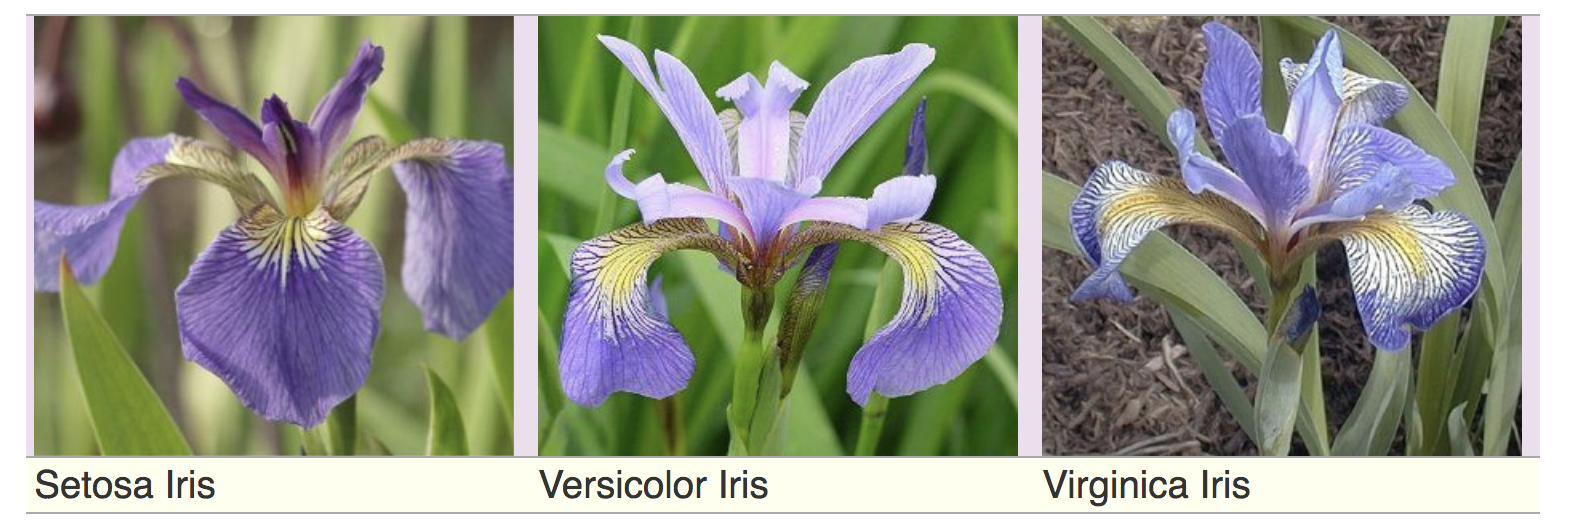

**Quick Question**:

If we want to design an algorithm to recognize iris species, what might the data be?  

Remember: we need a 2D array of size [n_samples x n_features].  

* What would the n_samples refer to?
* What might the n_features refer to?

Remember that there must be a fixed number of features for each sample, and feature number i must be a similar kind of quantity for each sample.

## Loading the Iris Data

Scikit-learn has a very straightforward set of data on these iris species. The data consist of the following:

* Features in the Iris dataset:
    + sepal length (cm), sepal width (cm), petal length (cm), and petal width (cm)  

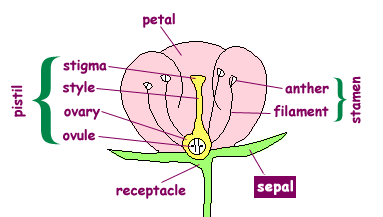
Source: https://extension.illinois.edu/gpe/glossary/sepal.html


* Target classes to predict:
    + Setosa, Versicolour, and Virginica  
    
`scikit-learn` embeds a copy of the iris CSV file along with a function to load it into numpy arrays:

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

The features of each sample flower are stored in the data attribute of the dataset:

In [2]:
print(iris.data.shape)

n_samples, n_features = iris.data.shape
print(n_samples)

print(n_features)

print(iris.data[0]) # one sample, four features

(150, 4)
150
4
[5.1 3.5 1.4 0.2]


The information about the class of each sample is stored in the target attribute of the dataset:

In [3]:
print(iris.target.shape)

print(iris.target)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The corresponding names of the classes are stored in the last attribute, namely `target_names`:

In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four-dimensional, but we can visualize two of the dimensions at a time using a scatter plot:

<Figure size 432x288 with 0 Axes>

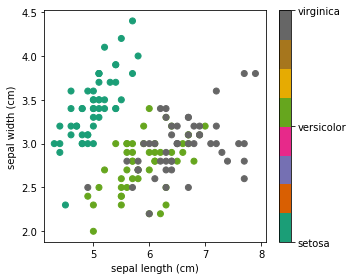

In [5]:
# Load the data
from sklearn.datasets import load_iris
iris = load_iris()

from matplotlib import pyplot as plt
plt.set_cmap('Dark2')

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

## Introducing the scikit-learn estimator object  

Every algorithm is exposed in scikit-learn via an ‘’Estimator’’ object. For instance a linear regression is: `sklearn.linear_model.LinearRegression`.  
Estimator parameters: All the parameters of an estimator can be set when it is instantiated:

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
print(model.normalize)

print(model)

True
LinearRegression(normalize=True)


Let’s create some simple data with numpy:

In [7]:
import numpy as np
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])
print(x)
print(y)
X = x[:, np.newaxis] # The input data for sklearn is 2D: (samples == 3 x features == 1)
print(X)

model.fit(X, y)

[0 1 2]
[0 1 2]
[[0]
 [1]
 [2]]


LinearRegression(normalize=True)

Estimated parameters: When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [8]:
model.coef_

array([1.])

**Quick question:**
Please explain this result!

## Supervised Learning: Classification and Regression

In **Supervised Learning**, we have a dataset consisting of both features and labels. The task is to construct an estimator which is able to predict the label of an object given the set of features. A relatively simple example is predicting the species of iris given a set of measurements of its flower. This is a relatively simple task. Some more complicated examples are:

* given a multicolor image of an object through a telescope, determine whether that object is a star, a quasar, or a galaxy.
* given a photograph of a person, identify the person in the photo.
* given a list of movies a person has watched and their personal rating of the movie, recommend a list of movies they would like (So-called recommender systems: a famous example is the Netflix Prize).

What these tasks have in common is that there is one or more unknown quantities associated with the object which needs to be determined from other observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**. In classification, the label is discrete, while in regression, the label is continuous. For example, in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a classification problem: the label is from three distinct categories. On the other hand, we might wish to estimate the age of an object based on such observations: this would be a regression problem, because the label (age) is a continuous quantity.

**Classification**: K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class. Let’s try it out on our iris classification problem:

In [9]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])

['virginica']


We'd like to plot the decision boundary of nearest neighbor decision on iris, first with a single nearest neighbor, and then using 3 nearest neighbors.

(4.180808080808081, 8.019191919191918, 1.8868686868686868, 4.513131313131313)

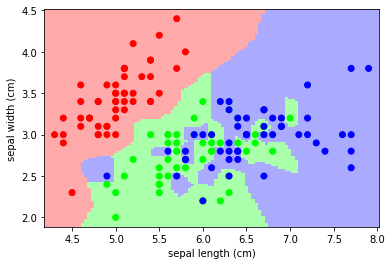

In [11]:
%matplotlib inline  
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) 
#https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ravel.html

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

We achieve a correspondence map between feature combinations and belonging to a species.

And now, redo the analysis with 3 neighbors.

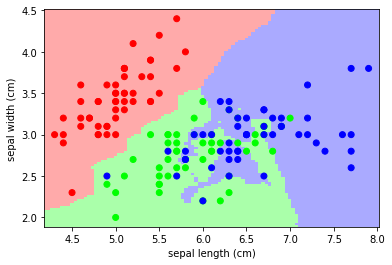

In [13]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()

** Quick question:**
1. Discuss the differences between both results with your neighbor.
2. Please debate why the results differ.
3. Which number of neighbors is more suitable?

## A recap on Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods, and we’ll see examples of these below. Given a scikit-learn estimator object named `model`, the following methods are available:  

**In all estimators:**  
* model.fit() : fit training data. For supervised learning applications, this accepts two arguments: the data X and the labels y (e.g. `model.fit(X, y)`). For unsupervised learning applications, this accepts only a single argument, the data X (e.g. `model.fit(X)`).

**In supervised estimators:**  
* `model.predict()` : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new))`, and returns the learned label for each object in the array.
* `model.predict_proba()` : For classification problems, some estimators also provide this method, which returns the probability that a new observation being in each of the categorical labels. In this case, the label with the highest probability is returned by `model.predict()`.
* `model.score()` : for classification or regression problems, most estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit (the R^2^ value is a popular score.

**In unsupervised estimators:**
 	
* `model.transform()` : given an unsupervised model, transform new data into the new basis. This also accepts one argument `X_new`, and returns the new representation of the data based on the unsupervised model.
* `model.fit_transform()` : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

## Regularization: what it is and why it is necessary

### Prefering simpler models
**Train errors** Suppose you are using a 1-nearest neighbor estimator. How many errors do you expect on your train set?

* Train set error is not a good measurement of prediction performance. You need to leave out a test set.
* In general, we should accept errors on the train set.

**An example of regularization** The core idea behind regularization https://en.wikipedia.org/wiki/Regularization_(mathematics) is that we are going to prefer models that are simpler, for a certain definition of ‘’simpler’‘, even if they lead to more errors on the train set.

As an example, let’s generate with a 9th order polynomial, with noise:

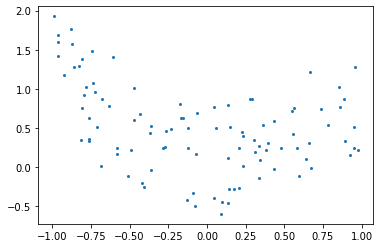

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import linear_model

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


rng = np.random.RandomState(0)
x = 2*rng.rand(100) - 1

f = lambda t: 1.2 * t**2 + .1 * t**3 - .4 * t **5 - .5 * t ** 9
y = f(x) + .4 * rng.normal(size=100)

x_test = np.linspace(-1, 1, 100)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)

Fitting 4th and 9th order polynomials  

For this we need to engineer features: the n_th powers of x:

Text(0.5, 1.0, 'Fitting a 4th and a 9th order polynomial')

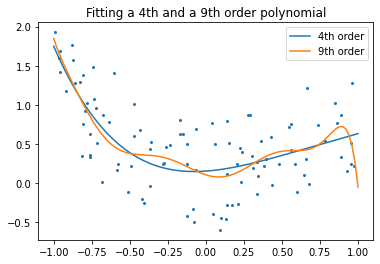

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)

X = np.array([x**i for i in range(5)]).T
X_test = np.array([x_test**i for i in range(5)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label='4th order')

X = np.array([x**i for i in range(10)]).T
X_test = np.array([x_test**i for i in range(10)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label='9th order')

plt.legend(loc='best')
plt.axis('tight')
plt.title('Fitting a 4th and a 9th order polynomial')

With your naked eyes, which model do you prefer, the 4th order one, or the 9th order one?

Let’s look at the ground truth (see PDF in Emil):

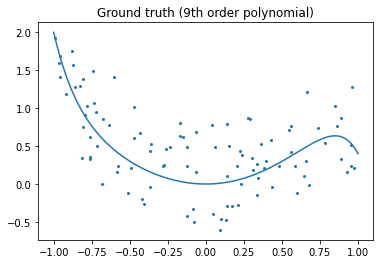

In [16]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)
plt.plot(x_test, f(x_test), label="truth")
plt.axis('tight')
plt.title('Ground truth (9th order polynomial)')

plt.show()

Regularization is ubiquitous in machine learning. Most scikit-learn estimators have a parameter to tune the amount of regularization. For instance, with k-NN, it is ‘k’, the number of nearest neighbors used to make the decision. k=1 amounts to no regularization: 0 error on the training set, whereas large k will push toward smoother decision boundaries in the feature space.

## Supervised Learning: Classification of Handwritten Digits

### The nature of the data

In this section we’ll apply scikit-learn to the classification of handwritten digits. This will go a bit beyond the iris classification we saw before: we’ll discuss some of the metrics which can be used in evaluating the effectiveness of a classification model.

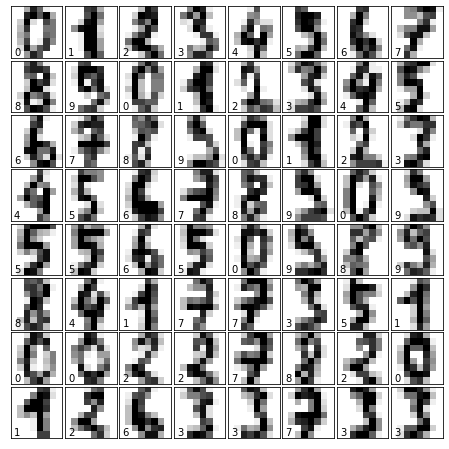

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### Visualizing the Data on its principal components

A good first-step for many problems is to visualize the data using a *Dimensionality Reduction* technique. We’ll start with the most straightforward one, **Principal Component Analysis (PCA)** https://en.wikipedia.org/wiki/Principal_component_analysis.

PCA seeks orthogonal linear combinations of the features which show the greatest variance, and as such, can help give you a good idea of the structure of the data set. Good examples can be find by https://de.wikipedia.org/wiki/Hauptkomponentenanalyse (in German).

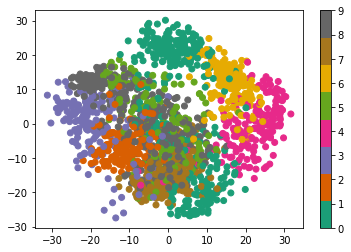

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target) 

plt.colorbar() 

**Quick question:**
Given these projections of the data, which numbers do you think a classifier might have trouble distinguishing?

### Gaussian Naive Bayes Classification

For most classification problems, it’s nice to have a simple, fast method to provide a quick baseline classification. If the simple and fast method is sufficient, then we don’t have to waste CPU cycles on more complex models. If not, we can use the results of the simple method to give us clues about our data.

One good method to keep in mind is Gaussian Naive Bayes (`sklearn.naive_bayes.GaussianNB`).

Gaussian Naive Bayes fits a Gaussian distribution to each training label independantly on each feature, and uses this to quickly give a rough classification. It is generally not sufficiently accurate for real-world data, but can perform surprisingly well, for instance on text data.

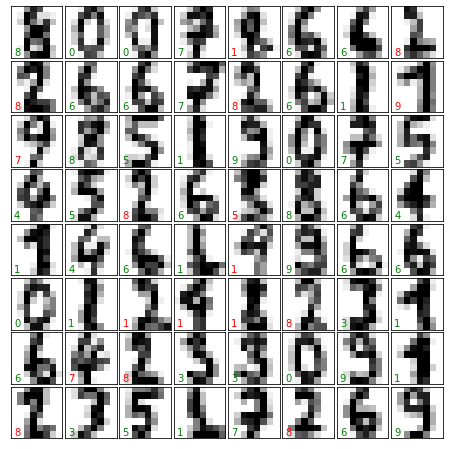

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

### Quantify the performance

We’d like to measure the performance of our estimator without having to resort to plotting examples. A simple method might be to simply compare the number of matches:

In [20]:
matches = (predicted == expected)
print(matches.shape)
print(matches.sum())

(450,)
359


Calculate the ration of correct predictions

In [21]:
matches.sum() / float(len(matches))

0.7977777777777778

We see that more than 80% of the 450 predictions match the input. But there are other more sophisticated metrics that can be used to judge the performance of a classifier: several are available in the `sklearn.metrics` submodule.

One of the most useful metrics is the `classification_report`, which combines several measures and prints a table with the results:

In [22]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.59      0.74      0.66        43
           2       0.68      0.32      0.43        41
           3       0.95      0.80      0.87        46
           4       0.94      0.87      0.90        54
           5       0.92      0.92      0.92        37
           6       1.00      0.96      0.98        49
           7       0.80      0.96      0.87        45
           8       0.44      0.71      0.54        41
           9       0.83      0.69      0.76        49

    accuracy                           0.80       450
   macro avg       0.81      0.79      0.79       450
weighted avg       0.82      0.80      0.80       450



Another enlightening metric for this sort of multi-label classification is a confusion matrix https://en.wikipedia.org/wiki/Confusion_matrix: it helps us visualize which labels are being interchanged in the classification errors:

In [23]:
print(metrics.confusion_matrix(expected, predicted))

[[43  0  0  0  0  2  0  0  0  0]
 [ 0 32  1  0  0  0  0  0  4  6]
 [ 0  7 13  0  0  0  0  0 21  0]
 [ 0  0  1 37  0  1  0  1  6  0]
 [ 0  1  2  0 47  0  0  4  0  0]
 [ 0  0  0  1  0 34  0  1  1  0]
 [ 0  2  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  1  0  0 43  0  1]
 [ 0 10  1  0  0  0  0  1 29  0]
 [ 0  2  1  1  2  0  0  4  5 34]]


We see here that in particular, the numbers 1, 2, 3, and 9 are often being labeled 8.

**Quick question:**
1. Why does the shape of matches is as it is?
2. Debate the classification report and the confusion matrix with your neighbor. Use the figure above (green and red entries) as a supporting tool.
3. Why did we split the data into training and validation sets?

## Supervised Learning: Regression of Housing Data
### A quick look at the data
We’ll use the simple Boston house prices set, available in scikit-learn. This records measurements of 13 attributes of housing markets around Boston, as well as the median price. The question is: can you predict the price of a new market given its attributes?:

In [24]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.data.shape)

print(data.target.shape)

(506, 13)
(506,)


We can see that there are just over 500 data points.

The `DESCR` variable has a long description of the dataset:

In [25]:
print(data.DESCR) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

It often helps to quickly visualize pieces of the data using histograms, scatter plots, or other plot types. With pylab, let us show a histogram of the target values: the median price in each neighborhood:

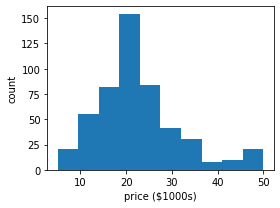

In [26]:
plt.figure(figsize=(4, 3))
plt.hist(data.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

Let’s have a quick look to see if some features are more relevant than others for our problem:

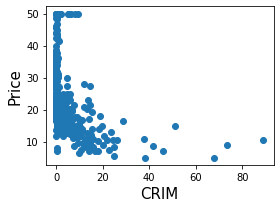

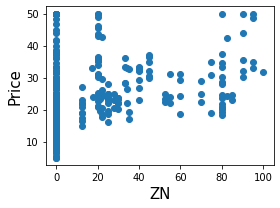

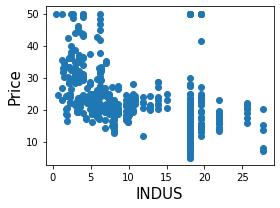

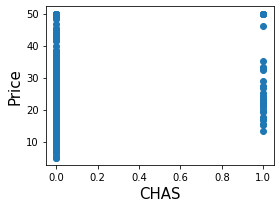

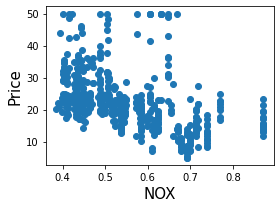

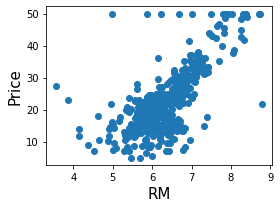

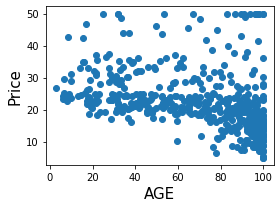

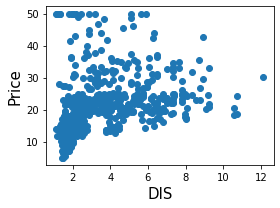

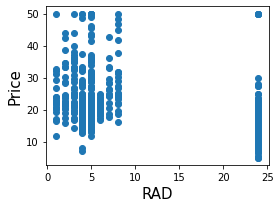

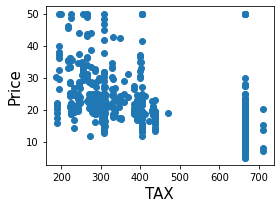

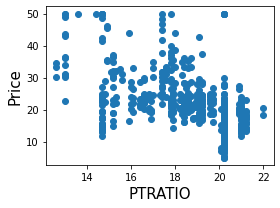

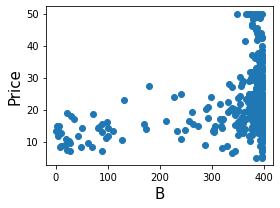

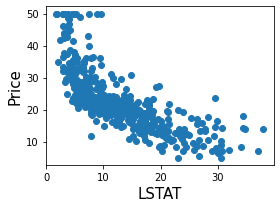

In [27]:
for index, feature_name in enumerate(data.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(data.data[:, index], data.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

This is a manual version of a technique called **feature selection**.

Sometimes, in Machine Learning it is useful to use feature selection to decide which features are the most useful for a particular problem. Automated methods exist which quantify this sort of exercise of choosing the most informative features.

### Predicting Home Prices: a Simple Linear Regression
Now we’ll use `scikit-learn` to perform a simple linear regression on the housing data. There are many possibilities of regressors to use. A particularly simple one is `LinearRegression`: this is basically a wrapper around an ordinary least squares calculation.

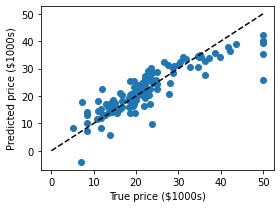

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

## Measuring prediction performance
### A quick test on the K-neighbors classifier

Here we’ll continue to look at the digits data, but we’ll switch to the K-Neighbors classifier. The K-neighbors classifier is an instance-based classifier. The K-neighbors classifier predicts the label of an unknown point based on the labels of the K nearest points in the parameter space.

In [29]:
# Get the data
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

# Instantiate and train the classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y) 


# Check the results using metrics
from sklearn import metrics
y_pred = clf.predict(X)

print(metrics.confusion_matrix(y_pred, y))

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]


Apparently, we’ve found a perfect classifier! But this is misleading for the reasons we saw before: the classifier essentially “memorizes” all the samples it has already seen. To really test how well this algorithm does, we need to try some samples it hasn’t yet seen.

This problem also occurs with regression models. In the following we fit an other instance-based model named “decision tree” to the Boston Housing price dataset we introduced previously:

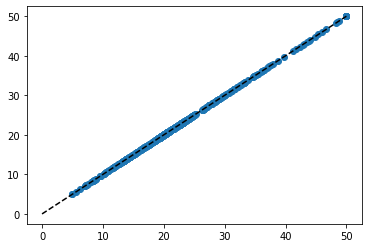

In [30]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor

data = load_boston()
clf = DecisionTreeRegressor().fit(data.data, data.target)
predicted = clf.predict(data.data)
expected = data.target

plt.scatter(expected, predicted) 

plt.plot([0, 50], [0, 50], '--k') 

Here again the predictions are seemingly perfect as the model was able to perfectly memorize the training set.

### A correct approach: Using a validation set

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.

To avoid over-fitting, we have to define two different sets:

* a training set `X_train, y_train` which is used for learning the parameters of a predictive model
* a testing set `X_test, y_test` which is used for evaluating the fitted predictive model

In `scikit-learn` such a random split can be quickly computed with the `train_test_split()` function:

In [31]:
from sklearn import model_selection
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                        test_size=0.25, random_state=0)

print("%r, %r, %r" % (X.shape, X_train.shape, X_test.shape))

(1797, 64), (1347, 64), (450, 64)


Now we train on the training data, and test on the testing data:

In [32]:
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  1  0  1  0  0  0 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        48
           9       0.98      0.96      0.97        47

    accuracy                           0.99       450
   macro avg       

The averaged `f1-score` is often used as a convenient measure of the overall performance of an algorithm. It appears in the bottom row of the classification report; it can also be accessed directly:

In [33]:
metrics.f1_score(y_test, y_pred, average="macro") 

0.9913675218842191

The over-fitting we saw previously can be quantified by computing the f1-score on the training data itself:

In [34]:
metrics.f1_score(y_train, clf.predict(X_train), average="macro")

1.0

### Model Selection via Validation

We have applied Gaussian Naives, support vectors machines, and K-nearest neighbors classifiers to the digits dataset. Now that we have these validation tools in place, we can ask quantitatively which of the three estimators works best for this dataset.

* With the default hyper-parameters for each estimator, which gives the best f1 score on the validation set? Recall that hyperparameters are the parameters set when you instantiate the classifier: for example, the `n_neighbors` in `clf = KNeighborsClassifier(n_neighbors=1)`

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                            test_size=0.25, random_state=0)

for Model in [GaussianNB, KNeighborsClassifier, LinearSVC]:
    clf = Model().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s: %s' %
          (Model.__name__, metrics.f1_score(y_test, y_pred, average="macro")))  

GaussianNB: 0.8332741681010101
KNeighborsClassifier: 0.9803567680392389
LinearSVC: 0.9326624082068943


/Users/thomas/.pyenv/versions/3.8.7/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


For each classifier, which value for the hyperparameters gives the best results for the digits data? For `LinearSVC`, use `loss='l2 (squared_hinge)'` and `loss='l1 (hinge)'` https://en.wikipedia.org/wiki/Hinge_loss. For `KNeighborsClassifier` we use `n_neighbors` between 1 and 10. Note that `GaussianNB` does not have any adjustable hyperparameters.

In [38]:
from sklearn import model_selection, datasets, metrics
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                            test_size=0.25, random_state=0)

for Model in [LinearSVC, GaussianNB, KNeighborsClassifier]:
    clf = Model().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s: %s' %
          (Model.__name__, metrics.f1_score(y_test, y_pred, average="macro")))

print('------------------')

# test SVC loss
for loss in ['hinge', 'squared_hinge']:
    clf = LinearSVC(loss=loss).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("LinearSVC(loss='{0}'): {1}".format(loss,
          metrics.f1_score(y_test, y_pred, average="macro")))

print('-------------------')

# test the number of neighbors
for n_neighbors in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("KNeighbors(n_neighbors={0}): {1}".format(n_neighbors,
        metrics.f1_score(y_test, y_pred, average="macro")))

/Users/thomas/.pyenv/versions/3.8.7/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/thomas/.pyenv/versions/3.8.7/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/thomas/.pyenv/versions/3.8.7/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC: 0.9350376475476017
GaussianNB: 0.8332741681010101
KNeighborsClassifier: 0.9803567680392389
------------------
LinearSVC(loss='hinge'): 0.9257514177354167
LinearSVC(loss='squared_hinge'): 0.9279076872528002
-------------------
KNeighbors(n_neighbors=1): 0.9913675218842191
KNeighbors(n_neighbors=2): 0.9848442068835102
KNeighbors(n_neighbors=3): 0.9867753449543099
KNeighbors(n_neighbors=4): 0.9803719053818863
KNeighbors(n_neighbors=5): 0.9803567680392389
KNeighbors(n_neighbors=6): 0.9757924194139573
KNeighbors(n_neighbors=7): 0.9780645792142071
KNeighbors(n_neighbors=8): 0.9780645792142071
KNeighbors(n_neighbors=9): 0.9780645792142071
KNeighbors(n_neighbors=10): 0.9755550897728812


### Cross-validation
Cross-validation consists in repetively splitting the data in pairs of train and test sets, called ‘folds’. `Scikit-learn` comes with a function to automatically compute score on all these folds. Here we do `KFold` with `k=5`.

In [39]:
clf = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=5)

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

We can use different splitting strategies, such as random splitting:

In [40]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5)
cross_val_score(clf, X, y, cv=cv)  

array([0.98333333, 0.97777778, 0.99444444, 0.97222222, 1.        ])

## Unsupervised Learning: Dimensionality Reduction and Visualization

Unsupervised learning is applied on X without y: data without labels. A typical use case is to find hidden structures in the data.

### Dimensionality Reduction: PCA

Dimensionality reduction derives a set of new artificial features smaller than the original feature set. Here we’ll use Principal Component Analysis (PCA), a dimensionality reduction that strives to retain most of the variance of the original data. We’ll use `sklearn.decomposition.PCA` on the iris dataset.

PCA computes linear combinations of the original features using a truncated Singular Value Decomposition of the matrix X, to project the data onto a base of the top singular vectors.

In [41]:
from sklearn.decomposition import PCA

X = iris.data
y = iris.target

pca = PCA(n_components=2, whiten=True)
pca.fit(X) 

PCA(n_components=2, whiten=True)

Once fitted, PCA exposes the singular vectors in the `components_` attribute:

In [42]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

Other attributes are available as well:

In [43]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

Let us project the iris dataset along those first two dimensions:

In [44]:
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

PCA normalizes and whitens the data, which means that the data is now centered on both components with unit variance https://en.wikipedia.org/wiki/Variance:

In [45]:
X_pca.mean(axis=0) 

X_pca.std(axis=0)

array([0.99666109, 0.99666109])

Furthermore, the samples components do no longer carry any linear correlation:

In [46]:
np.corrcoef(X_pca.T)  

array([[1.000000e+00, 1.096047e-15],
       [1.096047e-15, 1.000000e+00]])

With a number of retained components 2 or 3, PCA is useful to visualize the dataset:

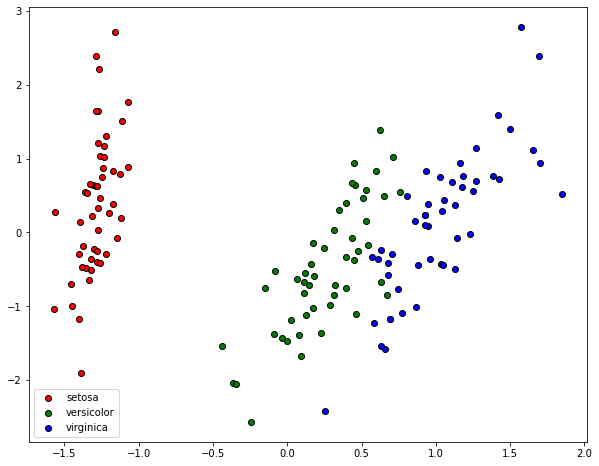

In [47]:
from matplotlib import pyplot as plt

target_ids = range(len(iris.target_names))

plt.figure(figsize=(10, 8))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c, label=label, edgecolors='black')
plt.legend(loc='best')

Note that this projection was determined without any information about the labels (represented by the colors): this is the sense in which the learning is **unsupervised**. Nevertheless, we see that the projection gives us insight into the distribution of the different flowers in parameter space: notably, *Iris setosa* is much more distinct than the other two species.

### Visualization with a non-linear embedding: tSNE

For visualization, more complex embeddings can be useful (for statistical analysis, they are harder to control). `sklearn.manifold.TSNE` is such a powerful manifold learning method. We apply it to the digits dataset, as the digits are vectors of dimension 8*8 = 64. Embedding them in 2D enables visualization:

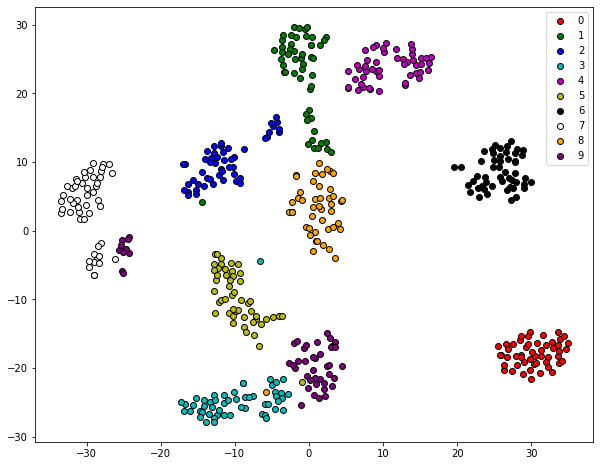

In [48]:
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

# Fit and transform with a TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

# Visualize the data
target_ids = range(len(digits.target_names))

plt.figure(figsize=(10, 8))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label, edgecolors='black')
plt.legend(loc='best')

## The eigenfaces example: chaining PCA and SVMs

The goal of this example is to show how an unsupervised method and a supervised one can be chained for better prediction. It starts with a didactic but lengthy way of doing things, and finishes with the idiomatic approach to pipelining in `scikit-learn`.

Here we’ll take a look at a simple facial recognition example. Ideally, we would use a dataset consisting of a subset of the `Labeled Faces` in the `Wild` data http://vis-www.cs.umass.edu/lfw/ that is available with `sklearn.datasets.fetch_lfw_people()`. However, this is a relatively large download (~200MB) so we will do the tutorial on a simpler, less rich dataset. Feel free to explore the LFW dataset.

In [49]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/thomas/scikit_learn_data


(400, 4096)

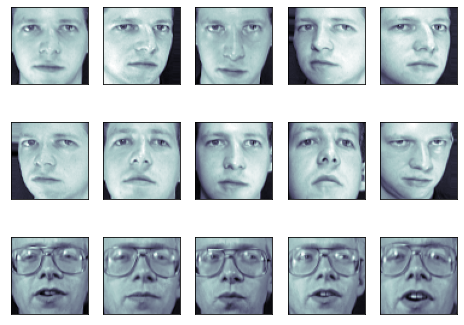

In [50]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

Note that these faces have already been localized and scaled to a common size. This is an important preprocessing piece for facial recognition, and is a process that can require a large collection of training data. This can be done in `scikit-learn`, but the challenge is gathering a sufficient amount of training data for the algorithm to work. Fortunately, this piece is common enough that it has been done. One good resource is OpenCV, the Open Computer Vision Library https://opencv.org/.

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


### Preprocessing: Principal Component Analysis

There are 1850 features covered in this dataset, which is quite a lot for SVM. We can use PCA to reduce these 1850 features to a manageable size, while maintaining most of the information in the dataset.

In [52]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

One interesting part of PCA is that it computes the “mean” face, which can be interesting to examine:

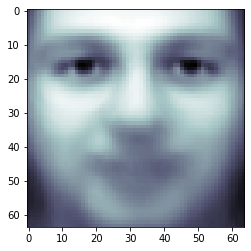

In [53]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)

The principal components measure deviations about this mean along orthogonal axes.

In [54]:
print(pca.components_.shape)

(150, 4096)


It is also interesting to visualize these principal components:

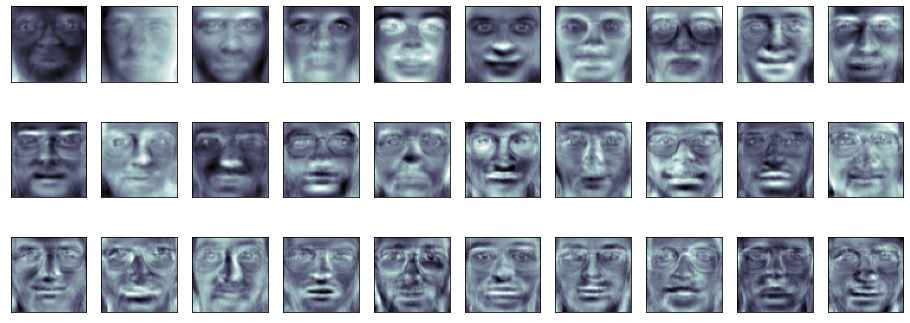

In [55]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

The components (“eigenfaces”) are ordered by their importance from top-left to bottom-right. We see that the first few components seem to primarily take care of lighting conditions; the remaining components pull out certain identifying features: the nose, eyes, eyebrows, etc.

With this projection computed, we can now project our original training and test data onto the PCA basis:

In [56]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 150)
(100, 150)


These projected components correspond to factors in a linear combination of component images such that the combination approaches the original face.

### Doing the Learning: Support Vector Machines
Now we’ll perform support-vector-machine classification https://en.wikipedia.org/wiki/Support_vector_machine on this reduced dataset:

In [57]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

Finally, we can evaluate how well this classification did. First, we might plot a few of the test-cases with the labels learned from the training set:

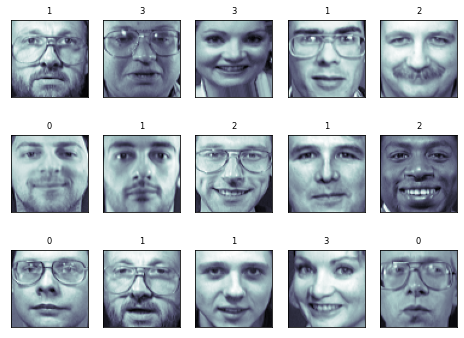

In [58]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred],
                 fontsize='small', color=color)

The classifier is correct on an impressive number of images given the simplicity of its learning model! Using a linear classifier on 150 features derived from the pixel-level data, the algorithm correctly identifies a large number of the people in the images.

Again, we can quantify this effectiveness using one of several measures from `sklearn.metrics`. First we can do the classification report, which shows the precision, recall and other measures of the “goodness” of the classification:

In [59]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       1.00    

And the confusion matrix...

In [60]:
print(metrics.confusion_matrix(y_test, y_pred))

[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


### Pipelining

Above we used PCA as a pre-processing step before applying our support vector machine classifier. Plugging the output of one estimator directly into the input of a second estimator is a commonly used pattern; for this reason `scikit-learn` provides a `Pipeline` object which automates this process. The above problem can be re-expressed as a pipeline as follows:

In [61]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),
                ('svm', svm.LinearSVC(C=1.0))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))

[[6 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


/Users/thomas/.pyenv/versions/3.8.7/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Parameter selection, Validation, and Testing
### Hyperparameters, Over-fitting, and Under-fitting

The issues associated with validation and cross-validation are some of the most important aspects of the practice of machine learning. Selecting the optimal model for your data is vital, and is a piece of the problem that is not often appreciated by machine learning practitioners.

The central question is: **If our estimator is underperforming, how should we move forward**?

* Use simpler or more complicated model?
* Add more features to each observed data point?
* Add more training samples?

The answer is often counter-intuitive. In particular, **sometimes using a more complicated model will give worse results**. Also, **Sometimes adding training data will not improve your results**. The ability to determine what steps will improve your model is what separates the successful machine learning practitioners from the unsuccessful.

#### Bias-variance trade-off: illustration on a simple regression problem
Let us start with a simple 1D regression problem. This will help us to easily visualize the data and the model, and the results generalize easily to higher-dimensional datasets. We’ll explore a simple linear regression problem, with `sklearn.linear_model`.

In [62]:
X = np.c_[ .5, 1].T
y = [.5, 1]
X_test = np.c_[ 0, 2].T

In [63]:
X

array([[0.5],
       [1. ]])

Without noise, as linear regression fits the data perfectly.

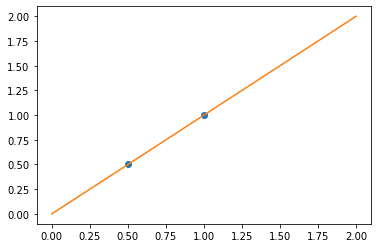

In [64]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(X, y, 'o')
plt.plot(X_test, regr.predict(X_test))

In real life situation, we have noise (e.g. measurement noise) in our data:

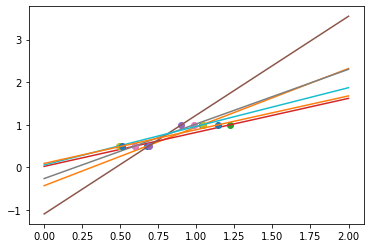

In [65]:
np.random.seed(0)
for _ in range(6):
    noisy_X = X + np.random.normal(loc=0, scale=.1, size=X.shape)
    plt.plot(noisy_X, y, 'o')
    regr.fit(noisy_X, y)
    plt.plot(X_test, regr.predict(X_test))

As we can see, our linear model captures and amplifies the noise in the data. It displays a lot of variance.

We can use another linear estimator that uses regularization, the `Ridge` estimator. This estimator regularizes the coefficients by shrinking them to zero, under the assumption that very high correlations are often spurious. The `alpha` parameter controls the amount of shrinkage used.

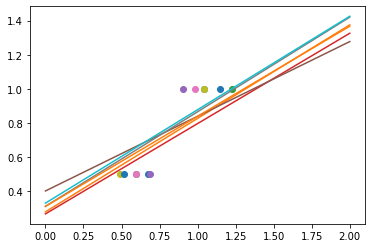

In [66]:
regr = linear_model.Ridge(alpha=.1)
np.random.seed(0)
for _ in range(6):
    noisy_X = X + np.random.normal(loc=0, scale=.1, size=X.shape)
    plt.plot(noisy_X, y, 'o')
    regr.fit(noisy_X, y)
    plt.plot(X_test, regr.predict(X_test))

As we can see, the estimator displays much less variance. However it systematically under-estimates the coefficient. It displays a biased behavior.

This is a typical example of **bias/variance tradeof**: non-regularized estimator are not biased, but they can display a lot of bias. Highly-regularized models have little variance, but high bias. This bias is not necessarily a bad thing: what matters is choosing the tradeoff between bias and variance that leads to the best prediction performance. For a specific dataset there is a sweet spot corresponding to the highest complexity that the data can support, depending on the amount of noise and of observations available.

### Visualizing the Bias/Variance Tradeoff
Given a particular dataset and a model (e.g. a polynomial), we’d like to understand whether bias (underfit) or variance limits prediction, and how to tune the hyperparameter (here d, the degree of the polynomial) to give the best fit.

On a given data, let us fit a simple polynomial regression model with varying degrees.

Demo overfitting, underfitting, and validation and learning curves with polynomial regression.

Fit polynomes of different degrees to a dataset: for too small a degree, the model underfits, while for too large a degree, it overfits.

In [67]:
import numpy as np
import matplotlib.pyplot as plt


def generating_func(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)

A polynomial regression:

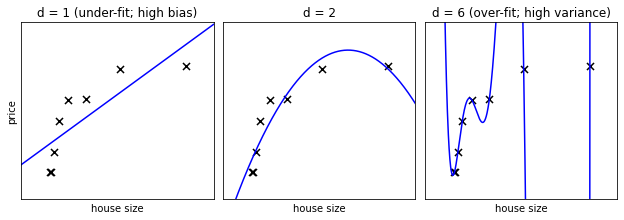

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

n_samples = 8

np.random.seed(0)
x = 10 ** np.linspace(-2, 0, n_samples)
y = generating_func(x)

x_test = np.linspace(-0.2, 1.2, 1000)

titles = ['d = 1 (under-fit; high bias)',
          'd = 2',
          'd = 6 (over-fit; high variance)']
degrees = [1, 2, 6]

fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)

for i, d in enumerate(degrees):
    ax = fig.add_subplot(131 + i, xticks=[], yticks=[])
    ax.scatter(x, y, marker='x', c='k', s=50)

    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), '-b')

    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 12)
    ax.set_xlabel('house size')
    if i == 0:
        ax.set_ylabel('price')

    ax.set_title(titles[i])

In the above figure, we see fits for three different values of d. For `d = 1`, the data is under-fit. This means that the model is too simplistic: no straight line will ever be a good fit to this data. In this case, we say that the model suffers from high bias. The model itself is biased, and this will be reflected in the fact that the data is poorly fit. At the other extreme, for `d = 6` the data is over-fit. This means that the model has too many free parameters (6 in this case) which can be adjusted to perfectly fit the training data. If we add a new point to this plot, though, chances are it will be very far from the curve representing the degree-6 fit. In this case, we say that the model suffers from high variance. The reason for the term “high variance” is that if any of the input points are varied slightly, it could result in a very different model.

In the middle, for `d = 2`, we have found a good mid-point. It fits the data fairly well, and does not suffer from the bias and variance problems seen in the figures on either side. What we would like is a way to quantitatively identify bias and variance, and optimize the metaparameters (in this case, the polynomial degree `d`) in order to determine the best algorithm.

### Validation Curves
Let us create a dataset like in the example above:

In [69]:
def generating_func(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)

# randomly sample more data
np.random.seed(1)
x = np.random.random(size=200)
y = generating_func(x, err=1.)

Central to quantify bias and variance of a model is to apply it on test data, sampled from the same distribution as the train, but that will capture independent noise:

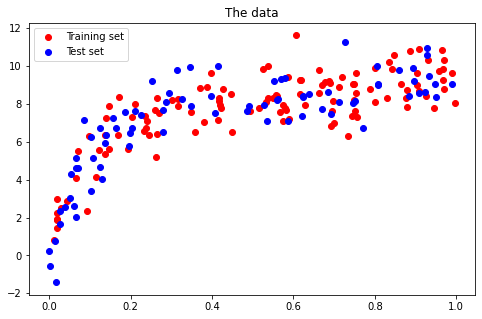

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

# show the training and validation sets
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, color='red', label='Training set')
plt.scatter(x_test, y_test, color='blue', label='Test set')
plt.title('The data')
plt.legend(loc='best')

**Validation curve** A validation curve consists in varying a model parameter that controls its complexity (here the degree of the polynomial) and measures both error of the model on training data, and on test data (eg with cross-validation). The model parameter is then adjusted so that the test error is minimized:

We use `sklearn.model_selection.validation_curve()` to compute train and test error, and plot it:

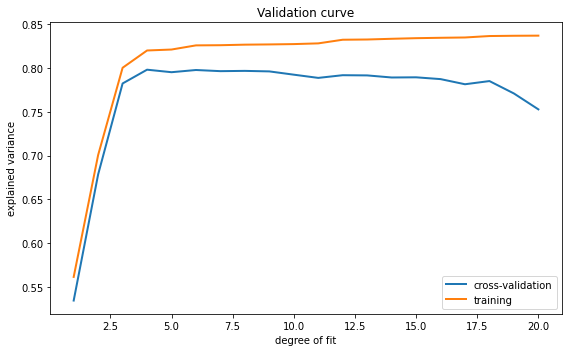

In [71]:
from sklearn.model_selection import validation_curve

degrees = np.arange(1, 21)

model = make_pipeline(PolynomialFeatures(), LinearRegression())

# The parameter to vary is the "degrees" on the pipeline step
# "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                 model, x[:, np.newaxis], y,
                 param_name='polynomialfeatures__degree',
                 param_range=degrees)

# Plot the mean train error and validation error across folds
plt.figure(figsize=(8, 5))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2,
         label='cross-validation')
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label='training')

plt.legend(loc='best')
plt.xlabel('degree of fit')
plt.ylabel('explained variance')
plt.title('Validation curve')
plt.tight_layout()

This figure shows why validation is important. On the left side of the plot, we have very low-degree polynomial, which under-fit the data. This leads to a low explained variance for both the training set and the validation set. On the far right side of the plot, we have a very high degree polynomial, which over-fits the data. This can be seen in the fact that the training explained variance is very high, while on the validation set, it is low. Choosing d around 4 or 5 gets us the best tradeoff.

The astute reader will realize that something is amiss here: in the above plot, d = 4 gives the best results. But in the previous plot, we found that d = 6 vastly over-fits the data. What’s going on here? The difference is the **number of training points** used. In the previous example, there were only eight training points. In this example, we have 100. As a general rule of thumb, the more training points used, the more complicated model can be used. But how can you determine for a given model whether more training points will be helpful? A useful diagnostic for this are learning curves.

### Learning Curves

A learning curve shows the training and validation score as a function of the number of training points. Note that when we train on a subset of the training data, the training score is computed using this subset, not the full training set. This curve gives a quantitative view into how beneficial it will be to add training samples.

**Quick questions:**
1. As the number of training samples are increased, what do you expect to see for the training score? For the validation score?
2. Would you expect the training score to be higher or lower than the validation score? Would you ever expect this to change?

Plot train and test error with an increasing number of samples:

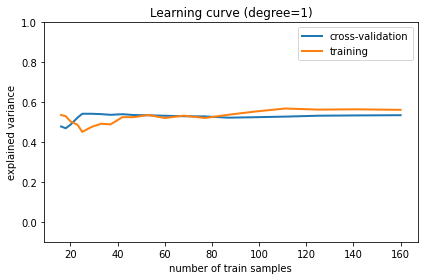

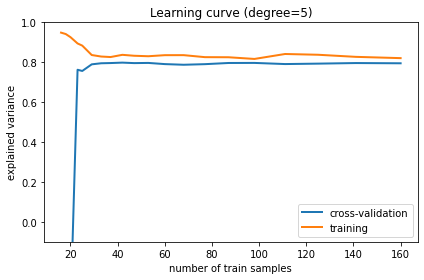

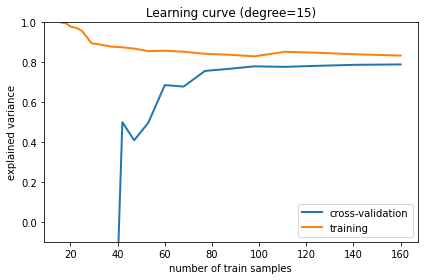

In [72]:
# A learning curve for d=1, 5, 15
for d in [1, 5, 15]:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())

    from sklearn.model_selection import learning_curve
    train_sizes, train_scores, validation_scores = learning_curve(
        model, x[:, np.newaxis], y,
        train_sizes=np.logspace(-1, 0, 20))

    # Plot the mean train error and validation error across folds
    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, validation_scores.mean(axis=1),
            lw=2, label='cross-validation')
    plt.plot(train_sizes, train_scores.mean(axis=1),
                lw=2, label='training')
    plt.ylim(ymin=-.1, ymax=1)

    plt.legend(loc='best')
    plt.xlabel('number of train samples')
    plt.ylabel('explained variance')
    plt.title('Learning curve (degree=%i)' % d)
    plt.tight_layout()


plt.show()

Note that the validation score generally increases with a growing training set, while the training score generally decreases with a growing training set. As the training size increases, they will converge to a single value.

From the above discussion, we know that `d = 1` is a high-bias estimator which under-fits the data. This is indicated by the fact that both the training and validation scores are low. When confronted with this type of learning curve, we can expect that adding more training data will not help: both lines converge to a relatively low score.

**When the learning curves have converged to a low score, we have a high bias model.**

A high-bias model can be improved by:

* Using a more sophisticated model (i.e. in this case, increase d)
* Gather more features for each sample.
* Decrease regularization in a regularized model.

Increasing the number of samples, however, does not improve a high-bias model.

Now let’s look at a high-variance (i.e. over-fit) model:
Here we show the learning curve for `d = 15`. From the above discussion, we know that `d = 15` is a high-variance estimator which over-fits the data. This is indicated by the fact that the training score is much higher than the validation score. As we add more samples to this training set, the training score will continue to decrease, while the cross-validation error will continue to increase, until they meet in the middle.

**Learning curves that have not yet converged with the full training set indicate a high-variance, over-fit model.**

A high-variance model can be improved by:

* Gathering more training samples.
* Using a less-sophisticated model (i.e. in this case, make d smaller)
* Increasing regularization.

In particular, gathering more features for each sample will not help the results.

### Summary on model selection
We’ve seen above that an under-performing algorithm can be due to two possible situations: high bias (under-fitting) and high variance (over-fitting). In order to evaluate our algorithm, we set aside a portion of our training data for cross-validation. Using the technique of learning curves, we can train on progressively larger subsets of the data, evaluating the training error and cross-validation error to determine whether our algorithm has high variance or high bias. But what do we do with this information?

#### High Bias
If a model shows high bias, the following actions might help:

* **Add more features** In our example of predicting home prices, it may be helpful to make use of information such as the neighborhood the house is in, the year the house was built, the size of the lot, etc. Adding these features to the training and test sets can improve a high-bias estimator
* **Use a more sophisticated model** Adding complexity to the model can help improve on bias. For a polynomial fit, this can be accomplished by increasing the degree d. Each learning technique has its own methods of adding complexity.
* **Use fewer samples** Though this will not improve the classification, a high-bias algorithm can attain nearly the same error with a smaller training sample. For algorithms which are computationally expensive, reducing the training sample size can lead to very large improvements in speed.
* **Decrease regularization** Regularization is a technique used to impose simplicity in some machine learning models, by adding a penalty term that depends on the characteristics of the parameters. If a model has high bias, decreasing the effect of regularization can lead to better results.

#### High Variance
If a model shows high variance, the following actions might help:

* **Use fewer features** Using a feature selection technique may be useful, and decrease the over-fitting of the estimator.
* **Use a simpler model** Model complexity and over-fitting go hand-in-hand.
* **Use more training samples** Adding training samples can reduce the effect of over-fitting, and lead to improvements in a high variance estimator.
* **Increase Regularization** Regularization is designed to prevent over-fitting. In a high-variance model, increasing regularization can lead to better results.

These choices become very important in real-world situations. For example, due to limited telescope time, astronomers must seek a balance between observing a large number of objects, and observing a large number of features for each object. Determining which is more important for a particular learning task can inform the observing strategy that the astronomer employs.

### A last word of caution: separate validation and test set
Using validation schemes to determine hyper-parameters means that we are fitting the hyper-parameters to the particular validation set. In the same way that parameters can be over-fit to the training set, hyperparameters can be over-fit to the validation set. Because of this, the validation error tends to under-predict the classification error of new data.

For this reason, it is recommended to split the data into three sets:

* The **training set**, used to train the model (usually ~60% of the data)
* The **validation set**, used to validate the model (usually ~20% of the data)
* The **test set**, used to evaluate the expected error of the validated model (usually ~20% of the data)

Many machine learning practitioners do not separate test set and validation set. But if your goal is to gauge the error of a model on unknown data, using an independent test set is vital.